## Milestone 2 Solution - Single task training
Refereneces:
- https://github.com/ThilinaRajapakse/simpletransformers/blob/master/examples/t5/training_on_a_new_task/train.py
- https://towardsdatascience.com/the-guide-to-multi-tasking-with-the-t5-transformer-90c70a08837b

#### Setup wandb 

In [1]:
%env WANDB_API_KEY=5e50cd48d6da45c08fc1d4a0c0efb1769e95d355

env: WANDB_API_KEY=5e50cd48d6da45c08fc1d4a0c0efb1769e95d355


#### Training on raw data

In [1]:
import wandb
import pandas as pd
from simpletransformers.t5 import T5Model

/Users/roman/test/code/manning/manning-lp/myvenv/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


1. Read the single_task_noupsampling file as `train_df` and `eval_df`

In [3]:
train_df = pd.read_csv("../singletask_noupsampling_train.csv").astype(str)
eval_df = pd.read_csv("../singlatask_noupsampling_val.csv").astype(str)

2. Define model_args dictioniary, train for 3 epochs

In [10]:
model_args = {
    "output_dir": './single-task-noupsample', #specify output directory
    "max_seq_length": 400,
    "train_batch_size": 2,
    "eval_batch_size": 2,
    "num_train_epochs": 3,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 15000,
    "evaluate_during_training_verbose": True,
    "use_multiprocessing": False,
    "fp16": False,
    "save_steps": -1,
    "save_eval_checkpoints": False,
    "save_model_every_epoch": False,
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "wandb_project": "T5 - single task",
    "use_cuda": False
}

In [11]:
model = T5Model("t5", "t5-small", args=model_args)
model.train_model(train_df, eval_data=eval_df)

ValueError: 'use_cuda' set to True when cuda is unavailable.Make sure CUDA is available or set `use_cuda=False`.

In [6]:
wandb.finish()

Training loss,0.00564
lr,0.001
global_step,288
_runtime,45
_timestamp,1625934089
_step,7
eval_loss,0.1957
train_loss,0.01583


Training loss,█▁▃▁▁
lr,▁▁▁▁▁
global_step,▁▂▂▄▅▅▇█
_runtime,▁▂▃▄▅▅▇█
_timestamp,▁▂▃▄▅▅▇█
_step,▁▂▃▄▅▆▇█
eval_loss,█▁▄
train_loss,█▁▂


##### Look at model performance

In [7]:
model_args = {
    "overwrite_output_dir": True,
    "max_seq_length": 400,
    "eval_batch_size": 4,
    "use_multiprocessing": False,
    "num_beams": 5,
    "do_sample": True,
    "max_length": 10,
    "top_k": 50,
    "top_p": 0.95,
    "num_return_sequences": 2,
}

In [33]:
# Load the trained model
model = T5Model("t5","single-task-noupsample", args=model_args)

In [34]:
# Prepare the data for testing
to_predict = [
    prefix + ": " + str(input_text)
    for prefix, input_text in zip(eval_df["prefix"].tolist(), eval_df["input_text"].tolist())
]
truth = eval_df["target_text"].tolist()
tasks = eval_df["prefix"].tolist()

# Get the model predictions
preds = model.predict(to_predict)

/home/winnie/miniconda3/envs/project2_env/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3282: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,


In [35]:
predicted_labels = []
for cur_pred in preds:
    cur_pred = cur_pred[0].strip()
    predicted_labels.append(cur_pred)

val_labels = eval_df['target_text']

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(val_labels, predicted_labels))

                 precision    recall  f1-score   support

       Question       0.90      0.97      0.94        37
         Review       0.00      0.00      0.00         3
Stylus problems       0.00      0.00      0.00         1
      Templates       0.78      0.88      0.82         8

       accuracy                           0.88        49
      macro avg       0.42      0.46      0.44        49
   weighted avg       0.81      0.88      0.84        49



/home/winnie/miniconda3/envs/project2_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/winnie/miniconda3/envs/project2_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/winnie/miniconda3/envs/project2_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Text(33.0, 0.5, 'True')

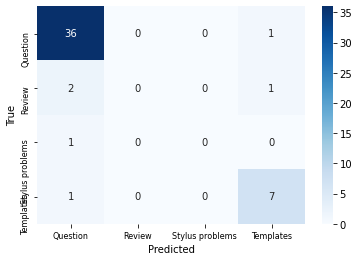

In [37]:
import matplotlib.pyplot as plt
cm = confusion_matrix(val_labels, predicted_labels)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, cmap='Blues')
labels=['Question','Review','Stylus problems','Templates']
ax.set_xticklabels(labels,fontsize=8)
ax.set_yticklabels(labels,fontsize=8)
plt.xlabel('Predicted')
plt.ylabel('True')

#### Train on upsampled data

In [14]:
train_df = pd.read_csv("singletask_train.csv").astype(str)
eval_df = pd.read_csv("singletask_noupsampling_val.csv").astype(str)

2. Define model_args dictioniary, train for 3 epochs

In [15]:
model_args = {
    "output_dir": './single-task-withupsample', #specify output directory
    "max_seq_length": 400,
    "train_batch_size": 2,
    "eval_batch_size": 2,
    "num_train_epochs": 4,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 15000,
    "evaluate_during_training_verbose": True,
    "use_multiprocessing": False,
    "fp16": False,
    "save_steps": -1,
    "save_eval_checkpoints": False,
    "save_model_every_epoch": False,
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "wandb_project": "T5 - single task",
}

In [16]:
model = T5Model("t5", "t5-small", args=model_args)
model.train_model(train_df, eval_data=eval_df)
wandb.finish()


Using Adafactor for T5


/home/winnie/miniconda3/envs/project2_env/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3282: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,


Training loss,0.00061
lr,0.001
global_step,652
_runtime,96
_timestamp,1625934196
_step,16
eval_loss,0.48061
train_loss,0.00154


Training loss,█▂▁▄▁▁▁▁▁▁▁▁▁
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▂▂▂▃▃▄▄▄▅▆▆▆▇▇██
_runtime,▁▂▂▂▃▃▄▄▅▅▆▆▆▇▇██
_timestamp,▁▂▂▂▃▃▄▄▅▅▆▆▆▇▇██
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
eval_loss,▁▅██
train_loss,▁█▁▂


##### Look at model performance

In [17]:
model_args = {
    "overwrite_output_dir": True,
    "max_seq_length": 400,
    "eval_batch_size": 4,
    "use_multiprocessing": False,
    "num_beams": 5,
    "do_sample": True,
    "max_length": 10,
    "top_k": 50,
    "top_p": 0.95,
    "num_return_sequences": 2,
}

In [18]:
# Load the trained model
model = T5Model("t5","single-task-withupsample", args=model_args)

In [19]:
# Prepare the data for testing
to_predict = [
    prefix + ": " + str(input_text)
    for prefix, input_text in zip(eval_df["prefix"].tolist(), eval_df["input_text"].tolist())
]
truth = eval_df["target_text"].tolist()
tasks = eval_df["prefix"].tolist()

# Get the model predictions
preds = model.predict(to_predict)

In [20]:
predicted_labels = []
for cur_pred in preds:
    cur_pred = cur_pred[0].strip()
    predicted_labels.append(cur_pred)

val_labels = eval_df['target_text']

In [21]:
from sklearn.metrics import classification_report
print(classification_report(val_labels, predicted_labels))

                 precision    recall  f1-score   support

       Question       0.88      0.97      0.92        37
         Review       0.50      0.33      0.40         3
Stylus problems       0.00      0.00      0.00         1
      Templates       1.00      0.62      0.77         8

       accuracy                           0.86        49
      macro avg       0.59      0.48      0.52        49
   weighted avg       0.86      0.86      0.85        49



Text(33.0, 0.5, 'True')

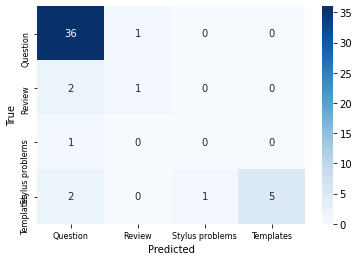

In [30]:
import matplotlib.pyplot as plt
cm = confusion_matrix(val_labels, predicted_labels)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, cmap='Blues')
labels=['Question','Review','Stylus problems','Templates']
ax.set_xticklabels(labels,fontsize=8)
ax.set_yticklabels(labels,fontsize=8)
plt.xlabel('Predicted')
plt.ylabel('True')

In [25]:
print(cm)

[[36  1  0  0]
 [ 2  1  0  0]
 [ 1  0  0  0]
 [ 2  0  1  5]]


4. Comment on the model performance between model 1 and model 2

## Results:
- The weighted f1-score of the model improved from 0.84 to 0.85 
- The F1 score for `Review` category also improves from 0 to 0.4!
- Next steps, we will look at how to leverage other subreddits besides the `Goodnotes` subreddit to help enhance the model 